###Get Data

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 13.46 MiB/s, done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [69]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

--2023-02-17 05:24:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-17 05:24:35 (101 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [3]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [4]:
data_dir = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'


In [5]:
import os

flienames = [data_dir + fliename for  fliename in os.listdir(data_dir)]
flienames


['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

###Preprocess Data

In [6]:
def get_lines(filename):

  """
  Read filename and returns the text as a list 
  """
  with open(filename) as f:
    return f.readlines()

In [7]:
train_lines = get_lines(data_dir+'train.txt')
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [8]:
len(train_lines)

210040

In [9]:
def prepocess_text(filename):
  """
  return a list of dictionaries ao abstract line data.
  """
  input_lines = get_lines(filename)
  abstract_lines = " "
  abstract_sample = []

  for line in input_lines:

    if line.startswith('###'):
      abstract_id = line
      abstract_lines = " "
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()

      for line_number , abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data['target'] = target_text_split[0]
        line_data['text'] = target_text_split[1].lower()
        line_data['line_number'] = line_number

        
        line_data['total_lines'] = len(abstract_line_split)-1
        abstract_sample.append(line_data)

    else:
      abstract_lines +=line

  return abstract_sample


In [10]:
%%time
train_samples = prepocess_text(data_dir+"train.txt")
val_samples = prepocess_text(data_dir+"dev.txt")
test_samples = prepocess_text(data_dir+"test.txt")

CPU times: user 377 ms, sys: 86 ms, total: 462 ms
Wall time: 463 ms


In [11]:
train_samples[:10]

[{'target': ' OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontar

###Text To DataFrame

In [12]:
import pandas as pd

train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [13]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [14]:
train_df['target'].value_counts()

METHODS         59274
RESULTS         57953
CONCLUSIONS     27155
BACKGROUND      14340
 OBJECTIVE       7521
 BACKGROUND      7387
OBJECTIVE        6318
 METHODS           79
 CONCLUSIONS       13
Name: target, dtype: int64

In [15]:
train_df['target'] = train_df['target'].apply(lambda x:str(x).strip())
val_df['target'] = val_df['target'].apply(lambda x:str(x).strip())
test_df['target'] = test_df['target'].apply(lambda x:str(x).strip())

In [ ]:
train_df['target'].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

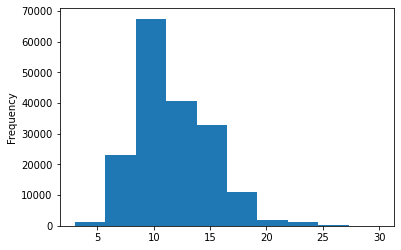

In [16]:
train_df.total_lines.plot.hist()

###Get list of sentences

In [17]:
train_sentences = train_df['text'].tolist()
val_sentences = val_df['text'].tolist()
test_sentences = test_df['text'].tolist()

In [18]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## Target labels into numbers 

In [21]:
train_df['target'].to_numpy()

array(['OBJECTIVE', 'METHODS', 'METHODS', ..., 'RESULTS', 'CONCLUSIONS',
       'CONCLUSIONS'], dtype=object)

In [19]:
#OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
train_label_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_label_one_hot = one_hot_encoder.transform(val_df['target'].to_numpy().reshape(-1,1))
test_label_one_hot = one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))


In [20]:
one_hot_encoder.get_feature_names_out()

array(['x0_BACKGROUND', 'x0_CONCLUSIONS', 'x0_METHODS', 'x0_OBJECTIVE',
       'x0_RESULTS'], dtype=object)

In [22]:
#OneHotEncoder

from sklearn.preprocessing import LabelEncoder

Label_encoder = LabelEncoder()
train_label_Label_encoder = Label_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_label_Label_encoder = Label_encoder.transform(val_df['target'].to_numpy().reshape(-1,1))
test_label_Label_encoder = Label_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))
train_label_Label_encoder

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 2, 2, ..., 4, 1, 1])

In [23]:
# Get class names and number of classes from LabelEncoder instance
num_classes = len(Label_encoder.classes_)
class_names = Label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

#Model 0 : Baseline Navie Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline


model_0 =Pipeline([
    ("tf_idf",TfidfVectorizer()),
    ('model_0',MultinomialNB())
])

model_0.fit(train_sentences,train_label_Label_encoder)

Pipeline(steps=[('tf_idf', TfidfVectorizer()), ('model_0', MultinomialNB())])

In [ ]:
model_0.score(val_sentences,val_label_Label_encoder)

0.7218323844829869

In [ ]:
baseline_preds = model_0.predict(val_sentences)

In [ ]:
from helper_functions import calculate_results

In [ ]:
baseline_results = calculate_results(val_label_Label_encoder,
                                     baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

#Preparing our data for deep sequence models

In [24]:
from tensorflow.keras import layers,Model
import tensorflow as tf
import numpy as np

In [25]:
sent_lens = [len(sentence.split()) for sentence in train_sentences ]
np.mean(sent_lens)

26.338269273494777

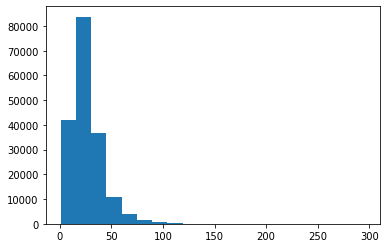

In [26]:
import matplotlib.pyplot as plt
plt.hist(sent_lens,bins=20)
plt.show()

In [27]:
output_seq_len = int(np.percentile(sent_lens,95))
output_seq_len

55

###Text vectorization

In [28]:
max_tokens = 68000

In [29]:
from matplotlib.textpath import TextPath
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    output_sequence_length = 55 )

In [30]:
#adapt mean fit the data

text_vectorizer.adapt(train_sentences)

In [31]:
# Test out text vectorizer on random sentences
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text: {text_vectorizer([target_sentence])}")

Text:
there were no differences between the two groups regarding analgesic requirements .

Length of text: 12

Vectorized text: [[  61    9   33  102   30    2   51   24  539  950 1953    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [32]:
text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(text_vocab)}")
print(f"Most common words in the vocab: {text_vocab[:5]}")
print(f"Least common words in the vocab: {text_vocab[-5:]}")

Number of words in vocab: 64841
Most common words in the vocab: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocab: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [33]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8'}

###Embedding layer

In [34]:
from tensorflow.keras.layers import Embedding

token_embed = Embedding(input_dim =len(text_vocab),
                     output_dim = 128,
                     mask_zero=True,
                     name="token_embedding"
)

In [35]:
# Show example embedding
print(f"Sentence before vectorization:\n {target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n {vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n {embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
 there were no differences between the two groups regarding analgesic requirements .

Sentence after vectorization (before embedding):
 [[  61    9   33  102   30    2   51   24  539  950 1953    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]

Sentence after embedding:
 [[[ 3.1028613e-03  1.2520775e-03 -3.3354484e-02 ... -4.1289330e-02
   -3.5101403e-02 -4.1343272e-05]
  [ 1.2491047e-02 -4.7883451e-02  3.2267537e-02 ... -4.1185297e-02
   -2.4513155e-04 -2.4245977e-02]
  [-4.3890607e-02 -2.6194006e-04 -1.8370450e-02 ...  1.9009557e-02
   -2.3745466e-02  4.7782127e-02]
  ...
  [-3.7954591e-02  1.0830104e-02  3.2353964e-02 ...  2.3781668e-02
   -3.6432184e-02 -3.6230467e-02]
  [-3.7954591e-02  1.0830104e-02  3.2353964e-02 ...  2.3781668e-02
   -3.6432184e-02 -3.6230467e-02]
  [-3.795

#creating dataset 

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences,train_label_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences,val_label_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences,test_label_one_hot))


In [ ]:
# Take the TensorSliceDataset's and turn them into prefected datasets
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

#Model 1 : Conv1D

In [ ]:
from matplotlib import text
input = layers.Input(shape=(1,),dtype=tf.string)
text_vector = text_vectorizer(input)
embed = token_embed(text_vector)

x = layers.Conv1D(64,kernel_size= 5,padding='same',activation='relu')(embed)
x = layers.GlobalAveragePooling1D()(x)
output = layers.Dense(num_classes,activation='softmax')(x)

model_1 = tf.keras.Model(input,output)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [ ]:
0.1*len(train_dataset)

562.7

In [ ]:
# Fit the model
history_model_1 = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1*len(train_dataset)),
                              epochs=5,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches

Epoch 1/5
562/562 [==============================] - 35s 45ms/step - loss: 0.9171 - accuracy: 0.6360 - val_loss: 0.6909 - val_accuracy: 0.7354
Epoch 2/5
562/562 [==============================] - 7s 12ms/step - loss: 0.6641 - accuracy: 0.7527 - val_loss: 0.6355 - val_accuracy: 0.7656
Epoch 3/5
562/562 [==============================] - 5s 10ms/step - loss: 0.6251 - accuracy: 0.7728 - val_loss: 0.6015 - val_accuracy: 0.7856
Epoch 4/5
562/562 [==============================] - 4s 7ms/step - loss: 0.5945 - accuracy: 0.7874 - val_loss: 0.5793 - val_accuracy: 0.7872
Epoch 5/5
562/562 [==============================] - 5s 8ms/step - loss: 0.5926 - accuracy: 0.7914 - val_loss: 0.5618 - val_accuracy: 0.7989


In [ ]:
model_1_preds = model_1.predict(valid_dataset)
model_1_preds

945/945 [==============================] - 3s 3ms/step


array([[5.2774554e-01, 1.8346275e-01, 5.8703873e-02, 1.7801076e-01,
        5.2077115e-02],
       [4.3727881e-01, 3.6463729e-01, 2.9553218e-02, 1.3432623e-01,
        3.4204423e-02],
       [1.8213716e-01, 6.7048939e-03, 1.3459487e-03, 8.0978185e-01,
        3.0126363e-05],
       ...,
       [2.6087901e-05, 6.6824164e-04, 4.2444160e-03, 2.2274511e-05,
        9.9503893e-01],
       [1.1308413e-01, 2.5294539e-01, 2.1617761e-01, 8.1810676e-02,
        3.3598223e-01],
       [1.6434848e-01, 7.2576821e-01, 4.2148072e-02, 1.1940906e-02,
        5.5794381e-02]], dtype=float32)

In [ ]:
model_1_preds = tf.argmax(model_1_preds,axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_1_results = calculate_results(val_label_Label_encoder,model_1_preds)
model_1_results

{'accuracy': 80.06752283860718,
 'precision': 0.8006517114805759,
 'recall': 0.8006752283860717,
 'f1': 0.7973737266186367}

#Model 2: pretrained embedding layer

In [ ]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
 # Test out the pretrained embedding on a random sentence 
random_train_sentence = random.choice(train_sentences)
print(f"Random sentence:\n {random_train_sentence}")
use_embedded_sentence = tf_hub_embedding_layer([random_train_sentence])
print(f"Setence after embedding:\n{use_embedded_sentence[0][:30]}\n")
print(f"Length of sentence embedding: {len(use_embedded_sentence[0])}")

Random sentence:
 median follow-up in lux-lung @ was @ months ( iqr @-@ ) ; @ ( @ % ) of @ patients had died .
Setence after embedding:
[-0.03166895  0.01515712 -0.02710279 -0.01838993 -0.05672004 -0.08379366
  0.04043622  0.01415213 -0.0037517  -0.02312039  0.09560651  0.00205369
 -0.02569385  0.05807542  0.0291889   0.03301226 -0.09659494  0.03445844
 -0.0235818   0.03243413 -0.07763734  0.04903818  0.06336251 -0.02408691
  0.02374099  0.02111354 -0.00684801  0.0675206  -0.0101054   0.02189222]

Length of sentence embedding: 512


In [ ]:
input = layers.Input(shape=[],dtype=tf.string)
x = tf_hub_embedding_layer(input)
x = layers.Dense(128,activation='relu')(x)
output = layers.Dense(num_classes,activation='softmax')(x)

model_2 = tf.keras.Model(input,output)

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_2.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model
history_model_2 = model_2.fit(train_dataset,
                              steps_per_epoch=int(0.1*len(train_dataset)),
                              epochs=5,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches

Epoch 1/5
562/562 [==============================] - 11s 16ms/step - loss: 0.9172 - accuracy: 0.6475 - val_loss: 0.7972 - val_accuracy: 0.6868
Epoch 2/5
562/562 [==============================] - 9s 16ms/step - loss: 0.7712 - accuracy: 0.7011 - val_loss: 0.7578 - val_accuracy: 0.7018
Epoch 3/5
562/562 [==============================] - 7s 13ms/step - loss: 0.7567 - accuracy: 0.7106 - val_loss: 0.7424 - val_accuracy: 0.7108
Epoch 4/5
562/562 [==============================] - 8s 14ms/step - loss: 0.7231 - accuracy: 0.7215 - val_loss: 0.7154 - val_accuracy: 0.7274
Epoch 5/5
562/562 [==============================] - 7s 13ms/step - loss: 0.7302 - accuracy: 0.7191 - val_loss: 0.6942 - val_accuracy: 0.7307


In [ ]:
model_2_preds = model_2.predict(valid_dataset)
model_2_preds

945/945 [==============================] - 18s 19ms/step


array([[6.6261864e-01, 2.1171919e-01, 2.7921225e-03, 1.1419815e-01,
        8.6719878e-03],
       [4.1423357e-01, 4.8807600e-01, 5.1453575e-03, 8.9545593e-02,
        2.9995036e-03],
       [3.4280464e-01, 7.4347869e-02, 5.7682749e-02, 4.7492269e-01,
        5.0241999e-02],
       ...,
       [1.8998379e-03, 2.4143562e-03, 9.6885681e-02, 6.1596063e-04,
        8.9818418e-01],
       [2.5910272e-03, 2.1128532e-02, 4.8693413e-01, 7.8971690e-04,
        4.8855656e-01],
       [1.8330266e-01, 3.5776153e-01, 4.0378219e-01, 3.4491171e-03,
        5.1704574e-02]], dtype=float32)

In [ ]:
model_2_preds = tf.argmax(model_2_preds,axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
model_2_results = calculate_results(val_label_Label_encoder,model_2_preds)
model_2_results

{'accuracy': 73.31854892095856,
 'precision': 0.7291645861802952,
 'recall': 0.7331854892095856,
 'f1': 0.7273258533694886}

#Model 3 :Conv1D with character-level tokeniser 

###character-level tokeniser 

In [45]:
train_sentences[:3]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .']

In [46]:
def split_chars(text):
  return " ".join(list(text))

In [47]:
split_chars(train_sentences[0])

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [48]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [49]:
# What's the average character length?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

In [50]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [51]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
num_char_token = len(alphabet)+2

char_vectorizer = TextVectorization(max_tokens=num_char_token,
                                    output_sequence_length = output_seq_char_len )

In [53]:
char_vectorizer.adapt(train_chars)

In [54]:
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(char_vocab)}")
print(f"Most common words in the vocab: {char_vocab[:5]}")
print(f"Least common words in the vocab: {char_vocab[-5:]}")

Number of words in vocab: 28
Most common words in the vocab: ['', '[UNK]', 'e', 't', 'i']
Least common words in the vocab: ['k', 'x', 'z', 'q', 'j']


In [55]:

# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n {random_train_chars}")
print(f"\nLength of random_train_chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n {vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
 t h e r e   a r e   n o   r a n d o m i z e d   s t u d i e s   t h a t   c o m p a r e   o u t c o m e s   a f t e r   s i n g l e - i n c i s i o n   (   s l c   )   a n d   c o n v e n t i o n a l   m u l t i - i n c i s i o n   (   m l c   )   l a p a r o s c o p i c   c h o l e c y s t e c t o m y   u n d e r   a n   o p t i m i z e d   p e r i o p e r a t i v e   a n a l g e s i c   r e g i m e n   .

Length of random_train_chars: 178

Vectorized chars:
 [[ 3 13  2  8  2  5  8  2  6  7  8  5  6 10  7 15  4 25  2 10  9  3 16 10
   4  2  9  3 13  5  3 11  7 15 14  5  8  2  7 16  3 11  7 15  2  9  5 17
   3  2  8  9  4  6 18 12  2  4  6 11  4  9  4  7  6  9 12 11  5  6 10 11
   7  6 21  2  6  3  4  7  6  5 12 15 16 12  3  4  4  6 11  4  9  4  7  6
  15 12 11 12  5 14  5  8  7  9 11  7 14  4 11 11 13  7 12  2 11 19  9  3
   2 11  3  7 15 19 16  6 10  2  8  5  6  7 14  3  4 15  4 25  2 10 14  2
   8  4  7 14  2  8  5  3  4 21  2  5  6  5 12 18  2  9  4 11  8  2 18  4


### charater Embedding

In [56]:
from tensorflow.keras.layers import Embedding

char_embed = Embedding(input_dim =len(char_vocab),
                     output_dim = 25,
                     mask_zero=True,
                     name="char_embedding"
)

In [57]:
# Show example embedding
target_sentence = random.choice(train_chars)
print(f"Sentence before vectorization:\n {target_sentence}\n")
vectorized_sentence = char_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n {vectorized_sentence}\n")
embedded_sentence = char_embed(vectorized_sentence)
print(f"Sentence after embedding:\n {embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
 t h e   o b j e c t i v e   w a s   t o   e x a m i n e   t h e   e f f e c t s   o f   v a r y i n g   n - @   ,   n - @   ,   a n d   l o n g e r - c h a i n   n - @   f a t t y   a c i d   c o m p o s i t i o n   o n   m a r k e r s   o f   c o r o n a r y   h e a r t   d i s e a s e   (   c h d   )   r i s k   .

Sentence after vectorization (before embedding):
 [[ 3 13  2  7 22 27  2 11  3  4 21  2 20  5  9  3  7  2 24  5 15  4  6  2
   3 13  2  2 17 17  2 11  3  9  7 17 21  5  8 19  4  6 18  6  6  5  6 10
  12  7  6 18  2  8 11 13  5  4  6  6 17  5  3  3 19  5 11  4 10 11  7 15
  14  7  9  4  3  4  7  6  7  6 15  5  8 23  2  8  9  7 17 11  7  8  7  6
   5  8 19 13  2  5  8  3 10  4  9  2  5  9  2 11 13 10  8  4  9 23  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0

###Model

In [ ]:
# Create char level datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_label_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_label_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_label_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
input = layers.Input(shape=(1,),dtype=tf.string)
char_vector = char_vectorizer(input)
embed = char_embed(char_vector)

x = layers.Conv1D(64,kernel_size= 5,padding='same',activation='relu')(embed)
x = layers.GlobalMaxPool1D()(x)
output = layers.Dense(num_classes,activation='softmax')(x)

model_3 = tf.keras.Model(input,output)

model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_model_3 = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1*len(train_char_dataset)),
                              epochs=5,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset))) # only validate on 10% of batches

Epoch 1/5
562/562 [==============================] - 5s 6ms/step - loss: 1.2719 - accuracy: 0.4837 - val_loss: 1.0581 - val_accuracy: 0.5844
Epoch 2/5
562/562 [==============================] - 3s 5ms/step - loss: 1.0084 - accuracy: 0.6001 - val_loss: 0.9529 - val_accuracy: 0.6250
Epoch 3/5
562/562 [==============================] - 4s 7ms/step - loss: 0.9240 - accuracy: 0.6403 - val_loss: 0.8734 - val_accuracy: 0.6533
Epoch 4/5
562/562 [==============================] - 3s 6ms/step - loss: 0.8659 - accuracy: 0.6652 - val_loss: 0.8444 - val_accuracy: 0.6596
Epoch 5/5
562/562 [==============================] - 3s 5ms/step - loss: 0.8492 - accuracy: 0.6724 - val_loss: 0.8179 - val_accuracy: 0.6799


In [ ]:
model_3_preds = model_3.predict(val_char_dataset)
model_3_preds

945/945 [==============================] - 2s 3ms/step


array([[0.15099   , 0.6343942 , 0.04584873, 0.13255493, 0.03621208],
       [0.2388632 , 0.6816297 , 0.0027234 , 0.07087205, 0.00591159],
       [0.141884  , 0.29702514, 0.11597841, 0.41750914, 0.02760324],
       ...,
       [0.02324654, 0.04364258, 0.04497574, 0.02726226, 0.86087286],
       [0.02849115, 0.25215408, 0.18872574, 0.0170713 , 0.51355773],
       [0.17400303, 0.7823239 , 0.01973726, 0.01822997, 0.00570583]],
      dtype=float32)

In [ ]:
model_3_preds = tf.argmax(model_3_preds,axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1])>

In [ ]:
model_3_results = calculate_results(val_label_Label_encoder,model_3_preds)
model_3_results

{'accuracy': 68.25764596848934,
 'precision': 0.6796853418457909,
 'recall': 0.6825764596848934,
 'f1': 0.6779976556642662}

#Model 4 : combining pretrained token embeding and character embedding

In [ ]:
# 1. setup token inputs/model
token_inputs = layers.Input(shape=[],dtype=tf.string,name='token_input')
token_embedding = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128,activation='relu')(token_embedding)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs =token_output )

# 2. setup char inputs/model
char_input = layers.Input(shape=(1,),dtype=tf.string,name='char_input')
char_vector = char_vectorizer(char_input)
char_embedding = char_embed(char_vector)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embedding)
char_model = tf.keras.Model(inputs=char_input,
                            outputs=char_bi_lstm)

# 3. concatenate token and char input
token_char_concat = layers.Concatenate(name='token_char_hybrid')([token_model.output,
                                                                  char_model.output])

# 4. create output layer 
combine_dropout = layers.Dropout(0.5)(token_char_concat)
combine_dense = layers.Dense(128,activation='relu')(combine_dropout)
final_dropout = layers.Dropout(0.1)(combine_dense)
output_layer = layers.Dense(num_classes,activation='softmax')(final_dropout)

# 5 construct model
model_4 = tf.keras.Model(inputs=[token_model.input,char_model.input],
                         outputs = output_layer,
                         name = "model_4_hybrid" 
                         )




In [ ]:
model_4.summary()

Model: "model_4_hybrid"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 290)         0           ['char_input[0][0]']             
 orization)                                                                                       
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_input[0][0]'

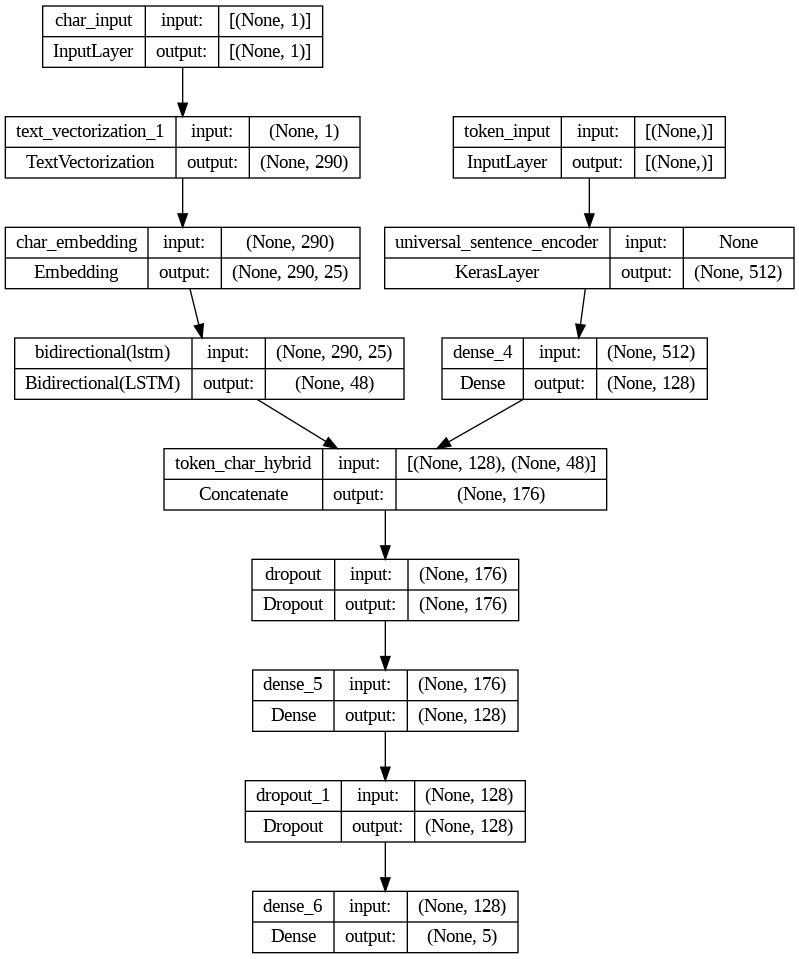

In [ ]:
#plot hybrid model

from keras.utils import plot_model
plot_model(model_4,show_shapes=True)

In [ ]:
#compile 

model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
train_token_char_data = tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_token_char_label = tf.data.Dataset.from_tensor_slices(train_label_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_token_char_data,train_token_char_label))

#prefatch
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_token_char_data = tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
val_token_char_label = tf.data.Dataset.from_tensor_slices(val_label_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_token_char_data,val_token_char_label))

#prefatch
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Fit the model
history_model_4 = model_4.fit(train_char_token_dataset,
                              steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                              epochs=5,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset))) # only validate on 10% of batches

Epoch 1/5
562/562 [==============================] - 42s 56ms/step - loss: 0.9393 - accuracy: 0.6296 - val_loss: 0.7700 - val_accuracy: 0.7045
Epoch 2/5
562/562 [==============================] - 28s 49ms/step - loss: 0.7672 - accuracy: 0.6993 - val_loss: 0.7004 - val_accuracy: 0.7287
Epoch 3/5
562/562 [==============================] - 32s 57ms/step - loss: 0.7485 - accuracy: 0.7136 - val_loss: 0.6780 - val_accuracy: 0.7397
Epoch 4/5
562/562 [==============================] - 29s 51ms/step - loss: 0.7211 - accuracy: 0.7246 - val_loss: 0.6519 - val_accuracy: 0.7553
Epoch 5/5
562/562 [==============================] - 27s 48ms/step - loss: 0.7246 - accuracy: 0.7215 - val_loss: 0.6465 - val_accuracy: 0.7457


In [ ]:
model_4_preds = model_4.predict(val_char_token_dataset)
model_4_preds

945/945 [==============================] - 25s 24ms/step


array([[5.71509004e-01, 1.75170928e-01, 7.92612322e-03, 2.30566964e-01,
        1.48269888e-02],
       [4.42040175e-01, 4.38355237e-01, 1.13338968e-02, 1.02666534e-01,
        5.60412183e-03],
       [4.16922003e-01, 4.39761057e-02, 7.84926042e-02, 4.31866199e-01,
        2.87431460e-02],
       ...,
       [4.25506325e-04, 1.53593195e-03, 3.82373817e-02, 1.17311632e-04,
        9.59683836e-01],
       [9.23034176e-03, 3.65081988e-02, 4.15597528e-01, 3.53488256e-03,
        5.35129070e-01],
       [2.71940827e-01, 5.23931980e-01, 1.63192376e-01, 8.45072977e-03,
        3.24840732e-02]], dtype=float32)

In [ ]:
model_4_preds = tf.argmax(model_4_preds,axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_4_results = calculate_results(val_label_Label_encoder,model_4_preds)
model_4_results

{'accuracy': 74.84443267575797,
 'precision': 0.7464961327680973,
 'recall': 0.7484443267575798,
 'f1': 0.7425271624863582}

#Model 5: token embedding + charater embedding + positional embedding

### create positional embedding

In [36]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [37]:
train_df['line_number'].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

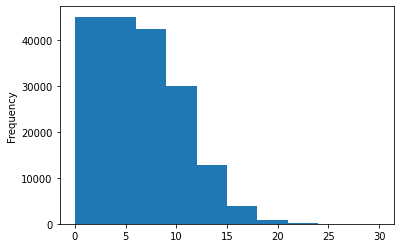

In [38]:
train_df.line_number.plot.hist()

In [39]:
# one hot encode line_number
train_line_number_one_hot = tf.one_hot(train_df['line_number'].to_numpy(),depth=15)
val_line_number_one_hot = tf.one_hot(val_df['line_number'].to_numpy(),depth=15)
test_line_number_one_hot = tf.one_hot(test_df['line_number'].to_numpy(),depth=15)
train_line_number_one_hot[:10],train_line_number_one_hot.shape

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>, TensorShape([180040, 15]))

In [40]:
train_df['total_lines'].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

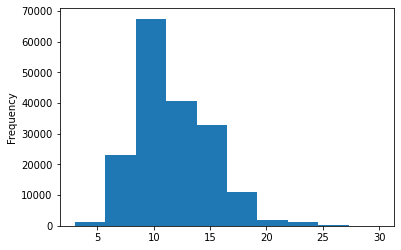

In [41]:
train_df['total_lines'].plot.hist()

In [42]:
train_total_lines_one_hot = tf.one_hot(train_df['total_lines'].to_numpy(),depth=20)

val_total_lines_one_hot = tf.one_hot(val_df['total_lines'].to_numpy(),depth=20)
test_total_lines_one_hot = tf.one_hot(test_df['total_lines'].to_numpy(),depth=20)

In [43]:
train_total_lines_one_hot.shape

TensorShape([180040, 20])

### Model

In [60]:
# 1. token input

token_input = layers.Input(shape=(1,),dtype=tf.string,name='token_input')
vector = text_vectorizer(token_input)
token_embedding = token_embed(vector)
token_output = layers.Bidirectional(layers.LSTM(24))(token_embedding)
token_model = tf.keras.Model(inputs=token_input,
                             outputs = token_output)

# 2. Char input
char_input = layers.Input(shape=(1,),dtype=tf.string,name='char_input')
char_vector = char_vectorizer(char_input)
char_embedding = char_embed(char_vector)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embedding)
char_model = tf.keras.Model(inputs=char_input,
                            outputs=char_bi_lstm)

# 3 line_number 

line_number_input = layers.Input(shape=(15,),dtype=tf.float32,name='line_number_input')
line_number_output = layers.Dense(32,activation='relu')(line_number_input)
line_number_model = tf.keras.Model(inputs=line_number_input,
                                   outputs = line_number_output)
# 4 total lines
total_lines_input = layers.Input(shape=(20,),dtype=tf.float32,name='total_lines_input')
total_lines_output = layers.Dense(32,activation='relu')(total_lines_input)
total_lines_model = tf.keras.Model(inputs=total_lines_input,
                                   outputs=total_lines_output)
# 5 : concate 1 and 2 model

token_char_model = layers.Concatenate(name='char_token',)([token_model.output,char_model.output])
z = layers.Dense(256,activation='relu')(token_char_model)
z = layers.Dropout(0.5)(z)

# 6 : concate 3 , 4 and 5 model
tribrid_embedding = layers.Concatenate(name='char_token_positional')([line_number_model.output,
                                                    total_lines_model.output,
                                                    z])
# 7 : create output layer
output_layer = layers.Dense(5,activation='softmax')(tribrid_embedding)

# model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_lines_model.input,
                                 token_model.input,
                                 char_model.input
                                 ],
                         outputs =output_layer)


In [61]:
model_5.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 token_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 55)          0           ['token_input[0][0]']            
 ization)                                                                                         
                                                                                                  
 text_vectorization_1 (TextVect  (None, 290)         0           ['char_input[0][0]']      

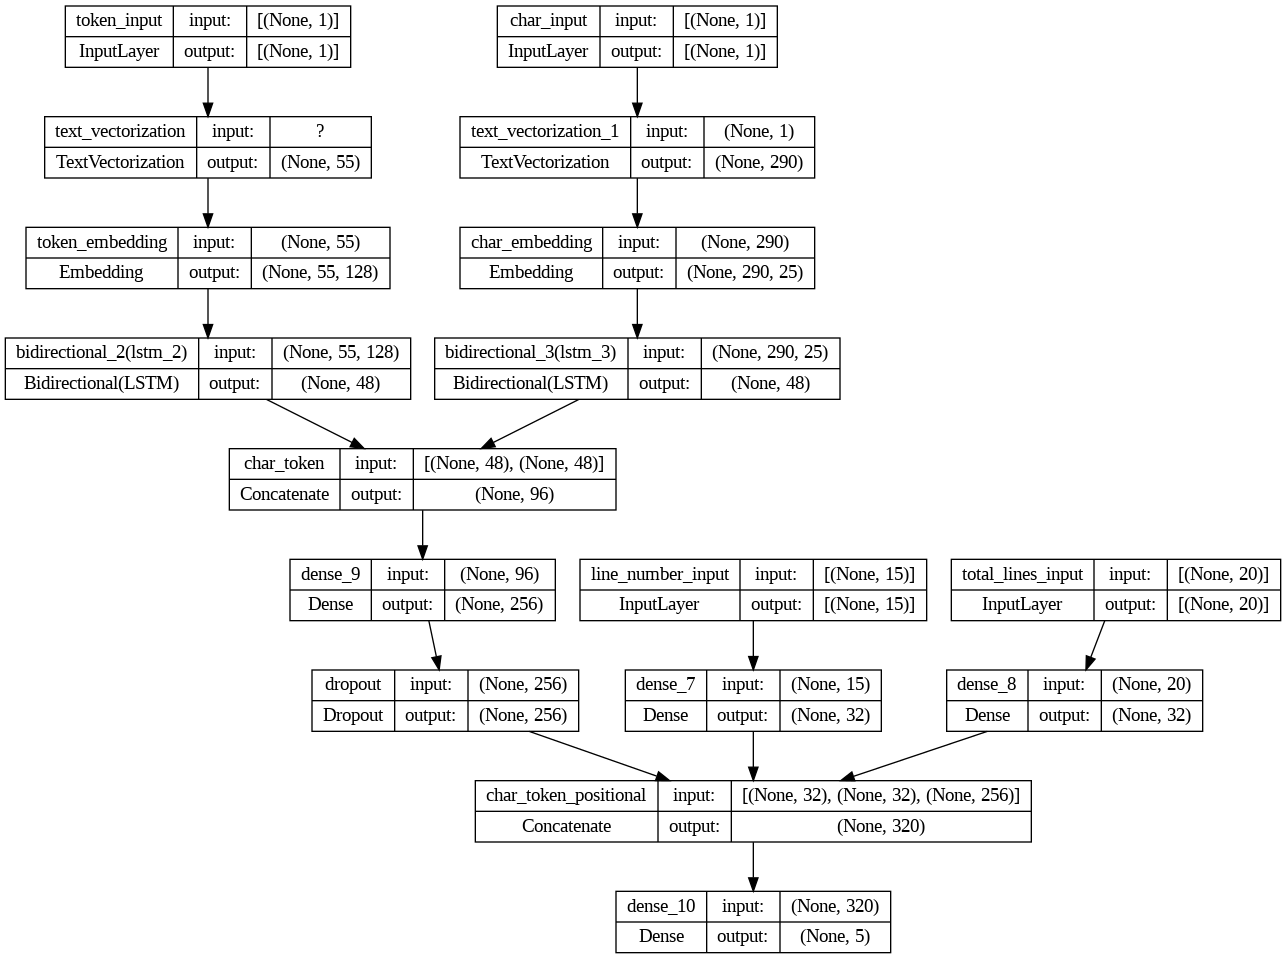

In [62]:
from keras.utils import plot_model
plot_model(model_5,show_shapes=True)

In [63]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### create tribrid dataset

In [64]:
# Create training and valiadation datasets (with all four kinds of input data)
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_line_number_one_hot,
                                                                train_total_lines_one_hot,
                                                                train_sentences,
                                                                train_chars))
train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_label_one_hot)
train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data, train_char_token_pos_labels))
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Do the same as above but for the validation dataset
val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((val_line_number_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(val_label_one_hot)
val_char_token_pos_dataset = tf.data.Dataset.zip((val_char_token_pos_data, val_char_token_pos_labels))
val_char_token_pos_dataset = val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [65]:
history_model_5 = model_5.fit(train_char_token_pos_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_token_pos_dataset)),
                              epochs=5,
                              validation_data=val_char_token_pos_dataset,
                              validation_steps=int(0.1 * len(val_char_token_pos_dataset)))

Epoch 1/5
562/562 [==============================] - 86s 110ms/step - loss: 1.0667 - accuracy: 0.7380 - val_loss: 0.9354 - val_accuracy: 0.8288
Epoch 2/5
562/562 [==============================] - 35s 63ms/step - loss: 0.9311 - accuracy: 0.8404 - val_loss: 0.9158 - val_accuracy: 0.8371
Epoch 3/5
562/562 [==============================] - 30s 53ms/step - loss: 0.9110 - accuracy: 0.8477 - val_loss: 0.9007 - val_accuracy: 0.8554
Epoch 4/5
562/562 [==============================] - 33s 58ms/step - loss: 0.9014 - accuracy: 0.8560 - val_loss: 0.8931 - val_accuracy: 0.8541
Epoch 5/5
562/562 [==============================] - 32s 57ms/step - loss: 0.8984 - accuracy: 0.8589 - val_loss: 0.8854 - val_accuracy: 0.8607


In [66]:
model_5_preds = model_5.predict(val_char_token_pos_dataset)
model_5_preds

945/945 [==============================] - 34s 23ms/step


array([[0.4292826 , 0.07156024, 0.05383291, 0.38489068, 0.06043358],
       [0.56590986, 0.08662692, 0.09353943, 0.21829677, 0.035627  ],
       [0.27544454, 0.11501443, 0.07747915, 0.49448612, 0.0375758 ],
       ...,
       [0.05100131, 0.0711142 , 0.04187952, 0.05000651, 0.78599846],
       [0.03601969, 0.62926674, 0.03550959, 0.0268904 , 0.27231357],
       [0.06227859, 0.79712373, 0.05606727, 0.01955127, 0.06497914]],
      dtype=float32)

In [67]:
model_5_preds = tf.argmax(model_5_preds,axis=1)
model_5_preds


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [71]:
from helper_functions import calculate_results

In [72]:
model_5_results = calculate_results(val_label_Label_encoder,model_5_preds)
model_5_results

{'accuracy': 86.60135045677214,
 'precision': 0.8694879854931036,
 'recall': 0.8660135045677214,
 'f1': 0.8627867052033793}

#Compare all the Model

In [ ]:
# Combine model results into a dataframe
all_model_results = pd.DataFrame({
                                  "model_1_custom_token_embedding": model_1_results,
                                  "model_2_pretrained_token_embedding": model_2_results,
                                  "model_3_custom_char_embedding": model_3_results,
                                  "model_4_hybrid_char_token_embedding": model_4_results,
                                  "model_5_pos_char_token_embedding": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model_1_custom_token_embedding,80.067523,0.800652,0.800675,0.797374
model_2_pretrained_token_embedding,73.318549,0.729165,0.733185,0.727326
model_3_custom_char_embedding,68.257646,0.679685,0.682576,0.677998
model_4_hybrid_char_token_embedding,74.844433,0.746496,0.748444,0.742527
model_5_pos_char_token_embedding,84.221501,0.845913,0.842215,0.838205


In [73]:
model_5.save('new_skimlit_model')